In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import lightkurve 
from lightkurve import KeplerLightCurve, KeplerTargetPixelFile
from k2sc.standalone import k2sc_lc

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


Populating the interactive namespace from numpy and matplotlib


## Here we debut a lightkurve-based wrapper for k2sc so you can more easily do k2sc operations interactively.

In [2]:
tpf = KeplerTargetPixelFile.from_archive(212300977) # WASP-55

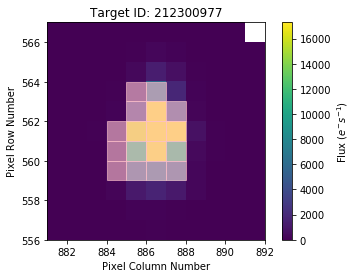

In [3]:
tpf.plot(frame=1,aperture_mask=tpf.pipeline_mask)

In [34]:
lc = tpf.to_lightcurve()
lc.primary_header = tpf.hdu[0].header
lc.data_header = tpf.hdu[1].header
lc.pos_corr1 = tpf.hdu[1].data['POS_CORR1'][tpf.quality_mask]
lc.pos_corr2 = tpf.hdu[1].data['POS_CORR2'][tpf.quality_mask]

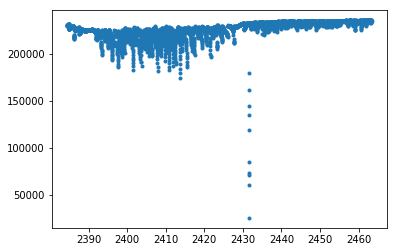

In [36]:
plt.plot(lc.time, lc.flux,'.')


### Let's now try K2SC

In [37]:
# now the magic happens
lc.__class__ = k2sc_lc

In [38]:
lc.k2sc()

Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 147 ( 0.0%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =   18.94 (fap 3.4161e-303 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
('  DE iteration %3i -ln(L) %4.1f', 0, -4425.828285093708)
('  DE iteration %3i -ln(L) %4.1f', 1, -4425.828285093708)
('  DE iteration %3i -ln(L) %4.1f', 2, -4425.828285093708)
('  DE iteration %3i -ln(L) %4.1f', 3, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 4, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 5, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 6, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 7, -4443.7621256508055)
('  DE iteration %3i -ln(L) %4.1f', 8, -4443.7621256508055)
('  DE iteration %3i -ln(L) %4.1f', 9, -4445.160390554532)
('  DE iteration %3i -ln(L) %4.1f', 10, -4445.160390554532)
('  DE iteration %3i -ln(L)

Text(0.5,1.01,'WASP-55')

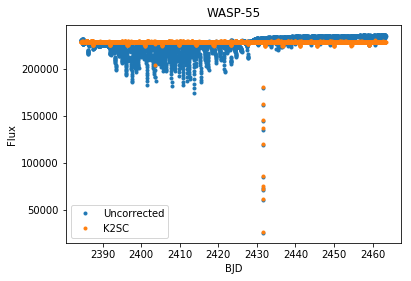

In [41]:
plt.plot(lc.time,lc.flux,'.',label="Uncorrected")
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),'.',label="K2SC")
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux')
plt.title('WASP-55',y=1.01)

(215000, 235000)

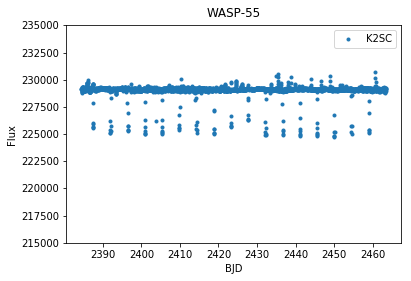

In [42]:
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),'.',label="K2SC")
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux')
plt.title('WASP-55',y=1.01)
plt.ylim(215000,235000)